In [70]:
pip install pomegranate

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-synthetic 0.6.1 requires matplotlib==3.3.2, but you have matplotlib 3.5.1 which is incompatible.
ydata-synthetic 0.6.1 requires numpy==1.19.*, but you have numpy 1.22.3 which is incompatible.
ydata-synthetic 0.6.1 requires scikit-learn==1.0.*, but you have scikit-learn 0.23.1 which is incompatible.
tensorflow 2.4.4 requires numpy~=1.19.2, but you have numpy 1.22.3 which is incompatible.
sdmetrics 0.4.1 requires scikit-learn<2,>=0.24, but you have scikit-learn 0.23.1 which is incompatible.
rdt 0.6.4 requires scikit-learn<2,>=0.24, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.23.1 which is incompatible.
ctgan 0.5.1 requires scikit-learn<2,>=0.24, but you have scikit-learn 0.23.1 which is incompatible.



  Using cached numpy-1.22.3-cp38-cp38-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1


In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from numpy import array, random, sum, unique
from pandas import DataFrame, read_csv

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn import metrics
from sklearn.manifold import TSNE

In [11]:
#Setting up the dataset for ML
# Text file data converted to integer data type
import numpy as np
x_data = np.loadtxt("dataset/x_dataTrain.txt", dtype=float)
print(x_data)

[[3.27030e-24 3.07616e-24 5.22539e-24 ... 1.32958e-21 1.33228e-21
  1.35562e-21]
 [1.30267e-20 1.30677e-20 1.31157e-20 ... 3.81686e-20 3.81212e-20
  3.80739e-20]
 [6.26322e-21 6.28294e-21 6.30602e-21 ... 1.83835e-20 1.83606e-20
  1.83378e-20]
 ...
 [2.18046e-21 2.18672e-21 2.19415e-21 ... 4.09628e-21 4.09113e-21
  4.08599e-21]
 [8.45625e-21 8.48075e-21 8.50976e-21 ... 1.65705e-20 1.65496e-20
  1.65289e-20]
 [9.18122e-27 9.43401e-27 1.16085e-26 ... 4.02891e-22 4.05835e-22
  4.14389e-22]]


In [12]:
#Setting up the dataset for ML
# Text file data converted to integer data type
y_data = np.loadtxt("dataset/y_dataTrain.txt", dtype=float)
print(y_data)

[[5.44779525e-02 3.63563344e-01 3.93226327e-01 ... 3.84039400e-03
  1.04632279e-03 8.05759487e-06]
 [4.16023007e-02 1.98831946e-01 3.19697149e-01 ... 1.58676888e-04
  2.70865681e-04 6.98852685e-06]
 [3.25809662e-02 3.30184164e-01 2.25277622e-01 ... 3.64259914e-04
  1.77938880e-05 5.15590766e-06]
 ...
 [6.00137545e-03 2.25446819e-01 2.36290974e-01 ... 3.41272939e-03
  1.68012889e-04 8.55777941e-06]
 [9.61424398e-03 2.41019755e-01 4.74460251e-01 ... 2.28148605e-03
  1.53862644e-04 3.59720563e-06]
 [1.48247666e-02 4.65782909e-01 3.00848722e-01 ... 5.70894991e-03
  1.74632155e-04 1.76412088e-06]]


In [17]:
features = pd.DataFrame(x_data)

In [18]:
#Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [22]:
#Applying PCA for random forest regression
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(scaled_features)
#principalDf = pd.DataFrame(data = principalComponents)

In [27]:
PC_values = np.arange(10) + 1
PC_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

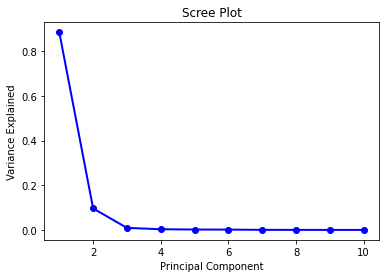

In [28]:
#Graphing scree plot
PC_values = np.arange(10) + 1
plt.plot(PC_values, pca.explained_variance_ratio_[:10], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(scaled_features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7'])

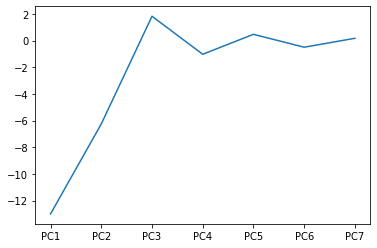

In [50]:
plt.plot(principalDf.iloc[78,:])
plt.show()

In [52]:
feature_dict = {
    0 : 'H2O',
    1 : 'CO2',
    2 : 'O2',
    3 : 'N2',
    4 : 'CH4',
    5 : 'N2O',
    6 : 'CO',
    7 : 'O3',
    8 : 'SO2',
    9 : 'NH3',
    10 : 'C2H6',
    11 : 'NO2'
}

In [53]:
labels = pd.DataFrame(y_data)
labels.rename(columns=feature_dict,
          inplace=True)
labelsSum = labels[['H2O','CO2', 'O2', 'N2', 'CH4']]

labelsSum['H2O'] = labelsSum['H2O'].apply(lambda x: x*100)
labelsSum['CO2'] = labelsSum['CO2'].apply(lambda x: x*100)
labelsSum['O2'] = labelsSum['O2'].apply(lambda x: x*100)
labelsSum['N2'] = labelsSum['N2'].apply(lambda x: x*100)
labelsSum['CH4'] = labelsSum['CH4'].apply(lambda x: x*100)

labelsSum

<ipython-input-53-cb945ec1c6d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelsSum['H2O'] = labelsSum['H2O'].apply(lambda x: x*100)
<ipython-input-53-cb945ec1c6d5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelsSum['CO2'] = labelsSum['CO2'].apply(lambda x: x*100)
<ipython-input-53-cb945ec1c6d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,H2O,CO2,O2,N2,CH4
0,5.447795,36.356334,39.322633,2.347669,12.807289
1,4.160230,19.883195,31.969715,37.276586,4.568130
2,3.258097,33.018416,22.527762,36.730550,2.988821
3,4.756591,22.928300,52.232608,0.433152,14.348949
4,8.355934,19.788123,39.827563,22.288283,6.370204
...,...,...,...,...,...
9998,3.211915,34.743236,35.990073,22.761101,1.522112
9999,1.049656,18.019818,33.185333,42.389717,3.421742
10000,0.600138,22.544682,23.629097,46.500135,5.045736
10001,0.961424,24.101976,47.446025,19.817285,4.904123


In [56]:
#principalDf['H2O'] = labelsSum['H2O']
principalDf['CO2'] = labelsSum['CO2']
#principalDf['O2'] = labelsSum['O2']
#principalDf['N2'] = labelsSum['N2']
#principalDf['CH4'] = labelsSum['CH4']

In [57]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,CO2
0,-25.424643,2.816010,-0.932619,-0.942056,0.745698,0.485008,-0.116221,36.356334
1,39.018136,-29.472460,7.854192,-0.731919,-1.544823,-2.029103,0.584580,19.883195
2,6.010855,-12.086132,3.994593,1.049289,0.840798,-1.299079,-0.334912,33.018416
3,30.156434,18.272219,-6.171593,3.593129,-6.599576,-0.526198,0.699163,22.928300
4,-23.095682,3.422651,-1.141312,-0.788522,0.414359,0.438226,-0.070641,19.788123
...,...,...,...,...,...,...,...,...
9998,-25.303770,3.240217,-0.555026,-0.276243,0.978344,0.225030,-0.285261,34.743236
9999,-8.128290,7.706736,-1.876401,1.225997,-0.965653,-0.001985,0.136725,18.019818
10000,-18.029311,-3.027248,0.804120,-1.089628,0.583664,-0.095435,0.067898,22.544682
10001,7.173905,-18.804619,5.598486,-1.138705,-0.311114,-1.824128,0.587837,24.101976


In [58]:
#Create synthetic data
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(principalDf)

C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\abhi\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  This parametrization corresponds to setting ``s = sigma`` and ``scale =
C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  support of the distribution.
C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4994: RuntimeWarning: divide by zero encountered in power
  for :math:`x > 0`, :math:`s > 0`.
C:\Users\abhi

In [64]:
sample = model.sample(num_rows=10003)
sample

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,CO2
0,32.819895,3.254940,2.294916,-0.841618,0.115154,-0.473377,-1.218560,10.822932
1,-19.552832,2.328499,4.827649,-1.187805,0.436129,0.355417,-0.115759,21.666435
2,-19.840057,3.193848,-1.331891,-0.465680,0.362523,0.398412,-0.142668,45.069349
3,-15.347173,1.892505,1.347932,-0.659646,-23.641809,0.752700,-0.125093,25.597680
4,-16.329537,2.498837,9.143116,-0.820945,0.385052,0.695602,-0.174950,15.301612
...,...,...,...,...,...,...,...,...
9998,-22.954749,3.738996,-0.824070,-0.665124,0.421508,0.448911,-0.124068,9.322314
9999,43.359667,3.380789,0.050138,-0.858312,0.787185,-27.899383,0.029504,56.460874
10000,48.505926,22.074452,-1.469326,-0.228345,0.358699,-0.880515,-0.032756,20.282312
10001,-19.744296,-17.270140,0.019577,-1.156155,1.623362,0.477563,-0.322678,42.892326


array([[<AxesSubplot:title={'center':'PC5'}>]], dtype=object)

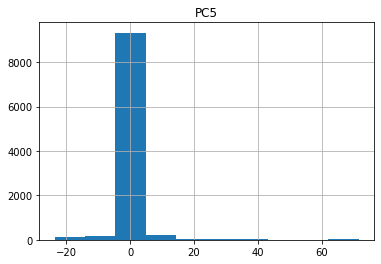

In [91]:
sample.hist(column='PC5')

array([[<AxesSubplot:title={'center':'PC5'}>]], dtype=object)

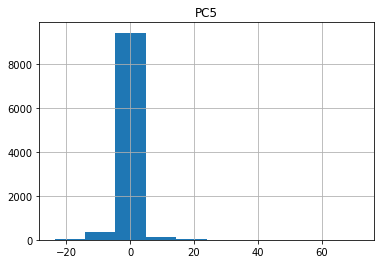

In [92]:
principalDf.hist(column='PC5')

In [66]:
from sdv.metrics.tabular import CSTest, KSTest
KSTest.compute(principalDf, sample)

0.861666500049985

In [74]:
from sdv.metrics.tabular import LogisticDetection, SVCDetection
print(LogisticDetection.compute(principalDf, sample))

0.6426807235745555


In [86]:
from sdv.metrics.tabular import MLPRegressor
MLPRegressor.compute(principalDf, sample, target='CO2')

C:\Users\abhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.014017071073312515

In [88]:
train = principalDf.sample(int(len(principalDf) * 0.75))
test = principalDf[~principalDf.index.isin(train.index)]
MLPRegressor.compute(train, test, target='CO2')

C:\Users\abhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.09599276240642096

In [93]:
synth_xData = model.sample(num_rows=100003)
synth_xData

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,CO2
0,3.800843,-1.135349,1.667748,-4.903879,0.182558,0.397283,0.282288,34.396179
1,-26.368221,2.761162,20.479960,-0.957649,0.773667,0.428519,-0.219944,40.220909
2,-25.555175,108.665855,-1.141170,0.231649,0.417497,0.323643,-0.113123,18.370588
3,7.330865,3.562408,0.805786,-0.542283,0.879555,0.423315,-0.072300,32.470788
4,23.245263,4.913978,-0.680322,0.253228,0.390238,1.731827,-0.354092,49.729345
...,...,...,...,...,...,...,...,...
99998,-23.308265,2.796422,-29.568854,-0.907400,0.734983,1.123325,-0.124037,5.925028
99999,-24.562845,3.715813,-0.454195,-0.644481,0.760562,-0.572444,-0.108457,2.570995
100000,-15.253873,3.870173,-1.737777,-1.740584,1.108741,0.470562,-1.210683,61.114849
100001,12.051484,4.937017,-0.906756,-0.816431,0.241525,0.382806,0.345216,16.810490


array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

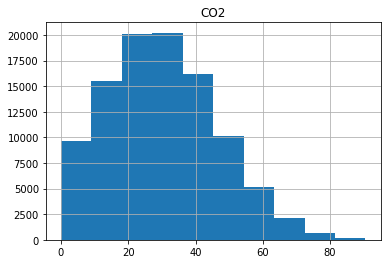

In [94]:
synth_xData.hist(column="CO2")

In [ ]:
synth = TimeGAN(model_parameters=gan_args, hidden_dim=hidden_dim, seq_len=seq_len, n_seq=n_seq, gamma=1)
synth.train(sample_x_data, train_steps=5)

Joint networks training:  20%|███████████                                            | 1/5 [17:23<1:09:32, 1043.09s/it]